<a href="https://colab.research.google.com/github/JaminUbuntu/IBOK_ML-CW/blob/main/ML_Coursework_Teleco_Churn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Loading the Data

In [54]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, roc_auc_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss, f1_score, precision_score, recall_score, accuracy_score, roc_curve
from sklearn.metrics import  classification_report
from math import sqrt

file = '/content/churn-bigml-80.csv'

In [2]:
# Load the dataset

df = pd.read_csv(file)

df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


# Data Preprocessing / EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

Check for missing values

In [4]:
df.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


Check for Duplicating values

In [5]:
duplicates = df.duplicated()
print(duplicates.sum())

0


Run a loop to check which features have atleast 18 unique elements in them

In [6]:
# Investigate all the elements whithin each Feature

for column in df:
    unique_vals = np.unique(df[column].fillna('0'))
    nr_values = len(unique_vals)
    if nr_values <= 18:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature State :51
The number of values for feature Account length :205
The number of values for feature Area code :3 -- [408 415 510]
The number of values for feature International plan :2 -- ['No' 'Yes']
The number of values for feature Voice mail plan :2 -- ['No' 'Yes']
The number of values for feature Number vmail messages :42
The number of values for feature Total day minutes :1489
The number of values for feature Total day calls :115
The number of values for feature Total day charge :1489
The number of values for feature Total eve minutes :1442
The number of values for feature Total eve calls :120
The number of values for feature Total eve charge :1301
The number of values for feature Total night minutes :1444
The number of values for feature Total night calls :118
The number of values for feature Total night charge :885
The number of values for feature Total intl minutes :158
The number of values for feature Total intl calls :21
The number of values for f

The loop will basically return all the features and their numer of occurence, most times it does not get close to 18

Check the State column to see the impact it will have on our dataset if we decided to label encode it

In [7]:
df['State']

,State
0,KS
1,OH
2,NJ
3,OH
4,OK
...,...
2661,SC
2662,AZ
2663,WV
2664,RI


In [8]:
# Sorting and printing all the unique values in the State feature

all_states = 'State'
unique_states = df[all_states].unique()
print(unique_states)

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VT' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'NE' 'WY' 'IL' 'NH' 'LA' 'GA' 'AK' 'MD' 'AR' 'WI'
 'OR' 'DE' 'IN' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'NY' 'KY'
 'ME' 'MS' 'MI' 'SC' 'TN' 'PA' 'HI' 'ND' 'CT']


<Axes: xlabel='State', ylabel='count'>

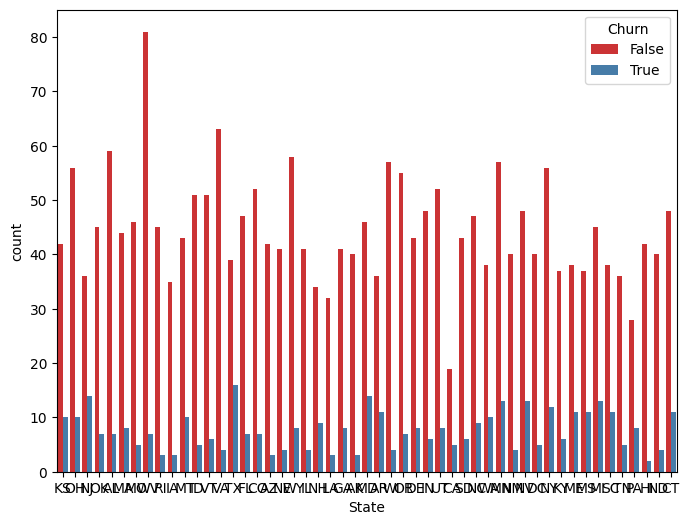

In [9]:


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='State', hue='Churn', palette = 'Set1')

In [10]:
# Drop State feature so it doesnt knock our dataset out of dimension
#when passed through the label encoder
df = df.drop(columns=['State'])

In [11]:
df

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


# EDA

Check for Data Variation on the Target Variable by percentage

In [12]:
#Variation in the target variable
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
False,0.854464
True,0.145536


<ipython-input-13-7aa93dcaef3f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette = 'Set1')


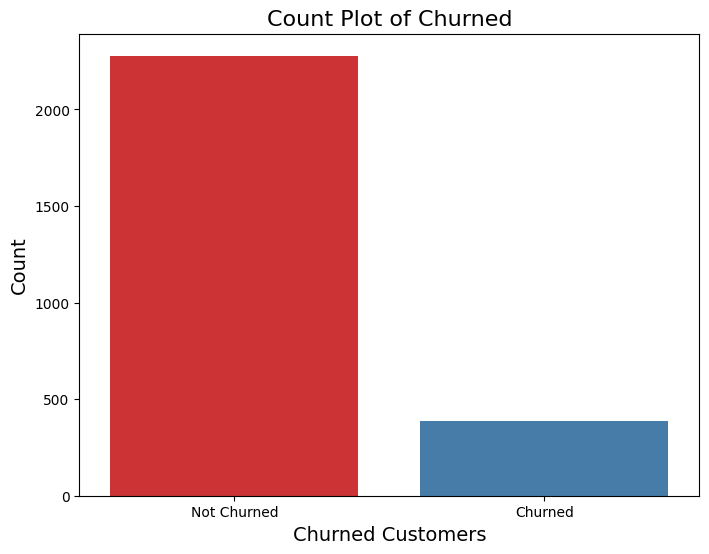

In [13]:

# Checking the balance of the Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Churn", palette = 'Set1')
plt.title("Count Plot of Churned", fontsize=16)
plt.xlabel("Churned Customers", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], labels=["Not Churned", "Churned"])
plt.show()

In [14]:
df.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

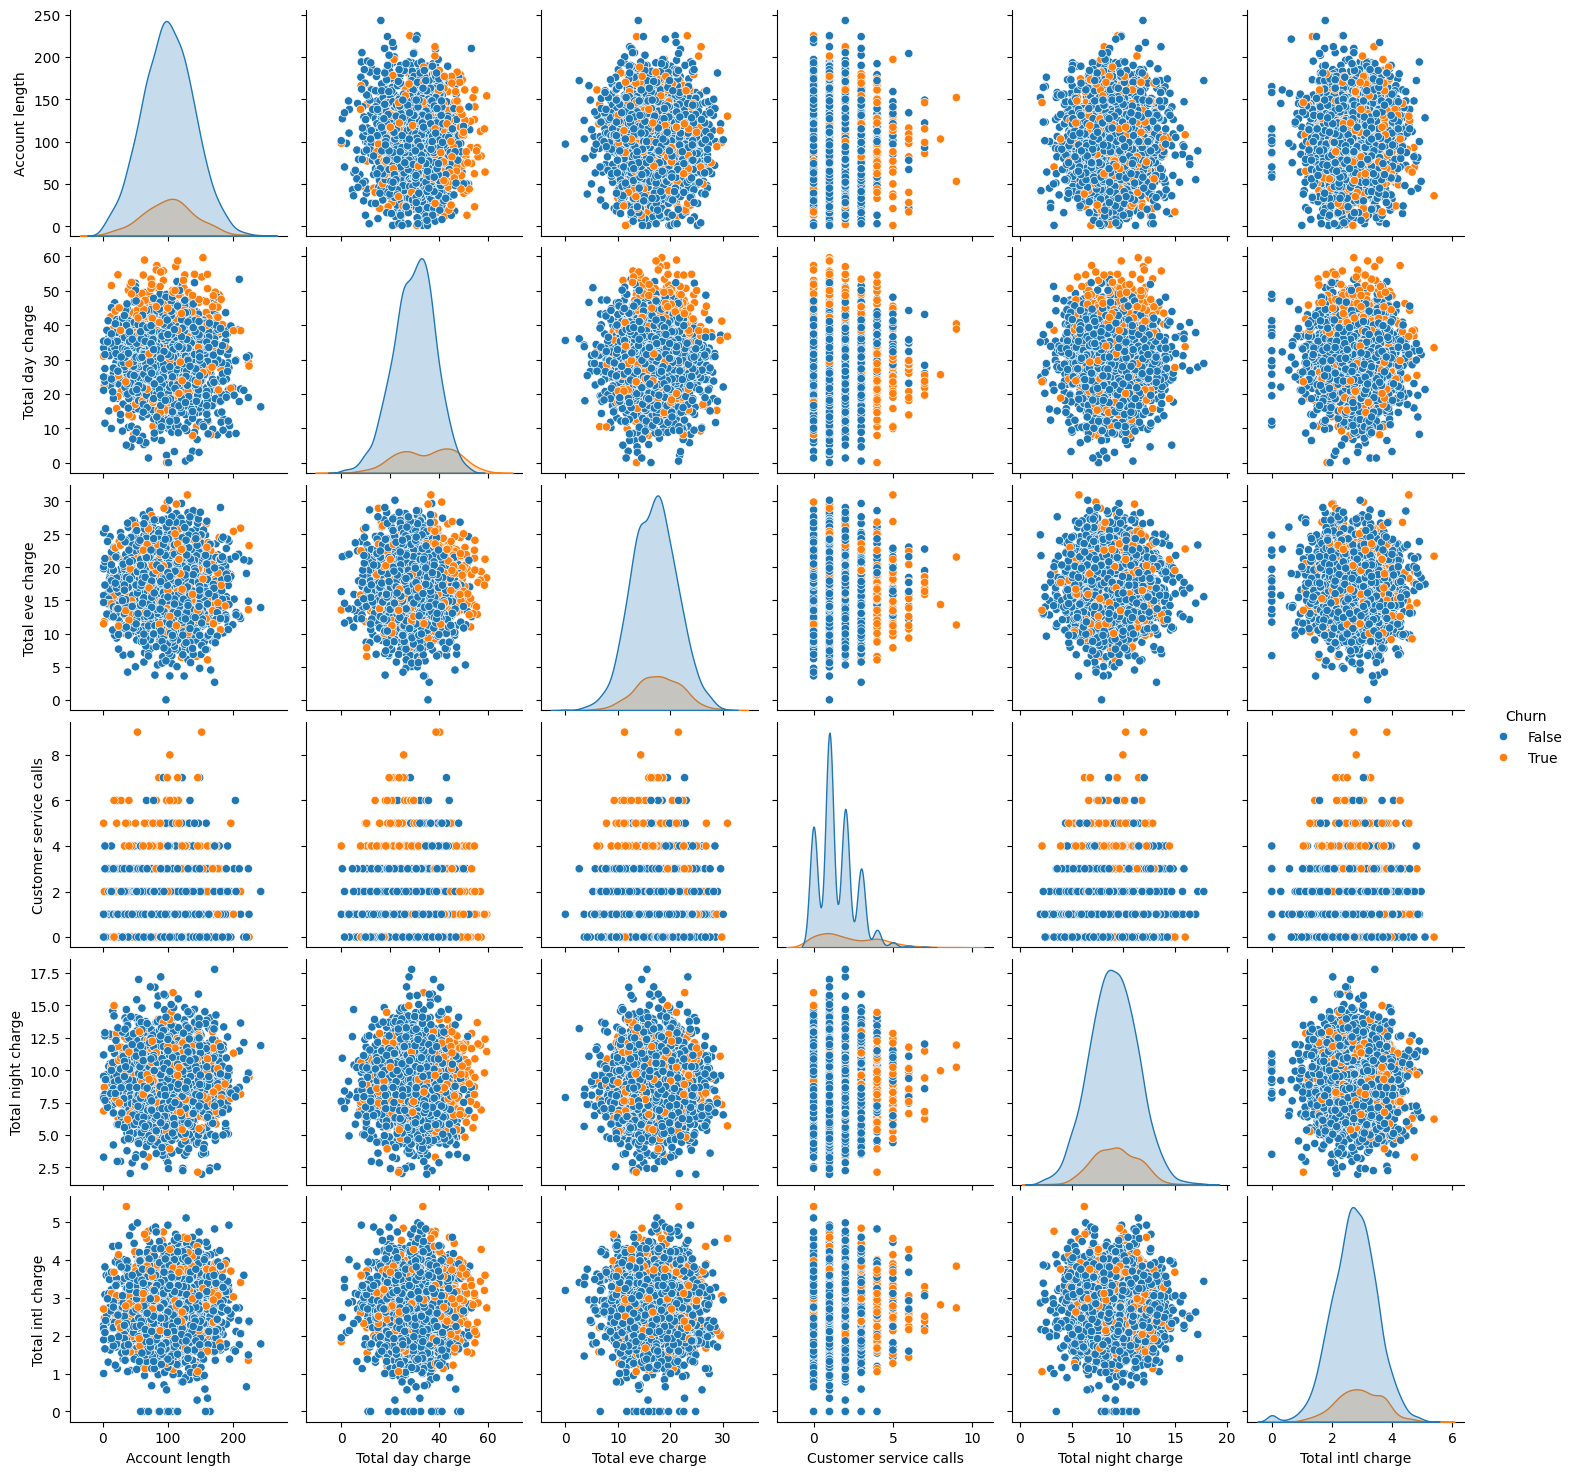

In [15]:
# Listing a few features of interest form the data so i can only see the things i want to see
df_f = df[[ 'Account length', 'Total day charge', 'Total eve charge', 'Customer service calls',
           'Total night charge', 'Total intl charge', 'Churn']]

# Visualizing
viz = sns.pairplot(df_f, hue = 'Churn')

Zoomed in preview of a few Features of Interest based on the result of the overal pairplot

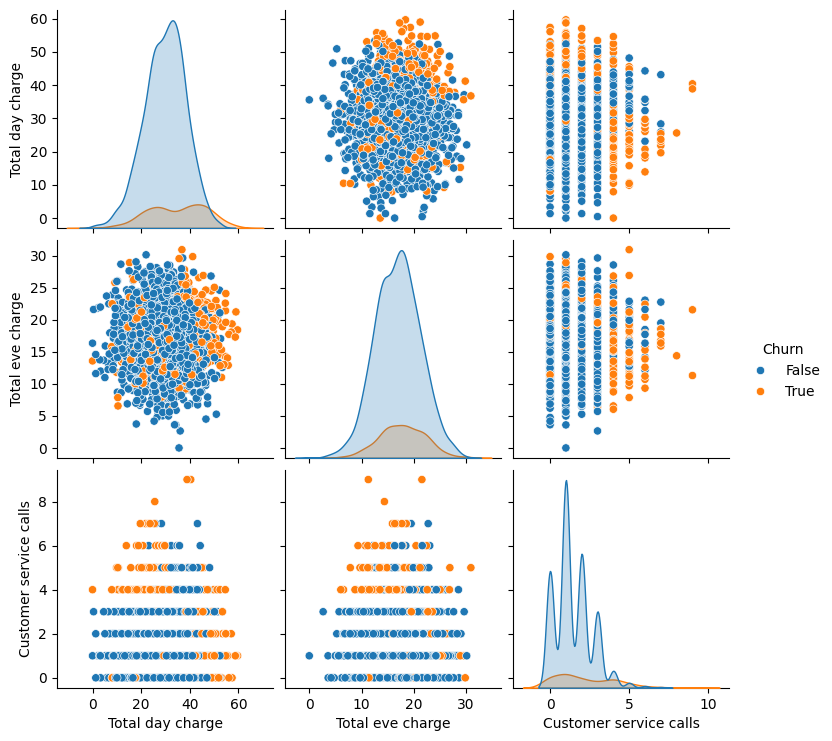

In [16]:
df_compare = sns.pairplot(df[['Total day charge',  'Total eve charge', 'Customer service calls', 'Churn']], hue ='Churn')

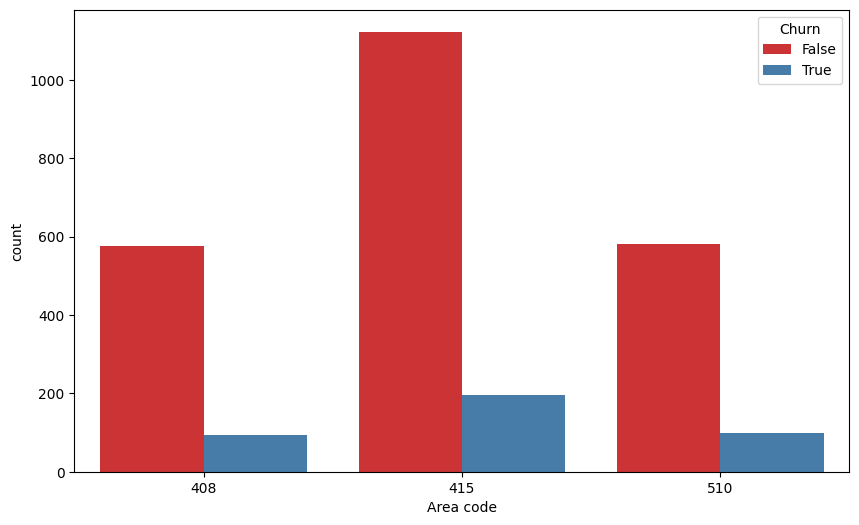

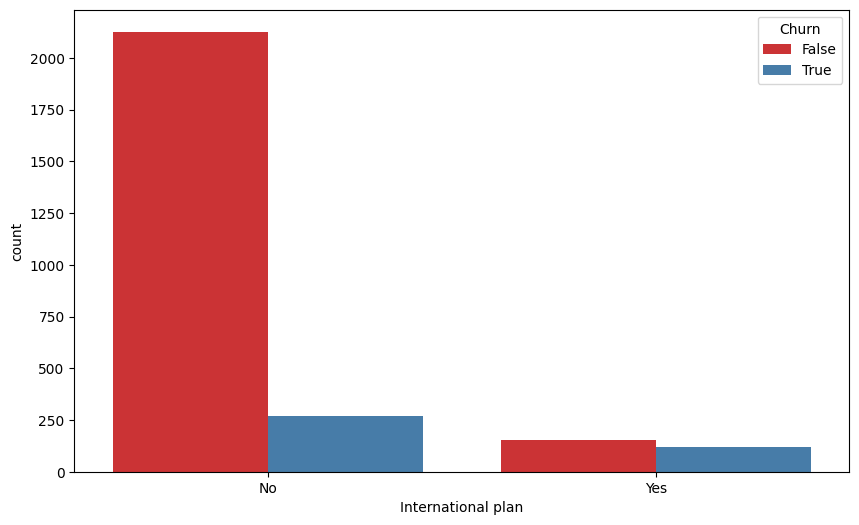

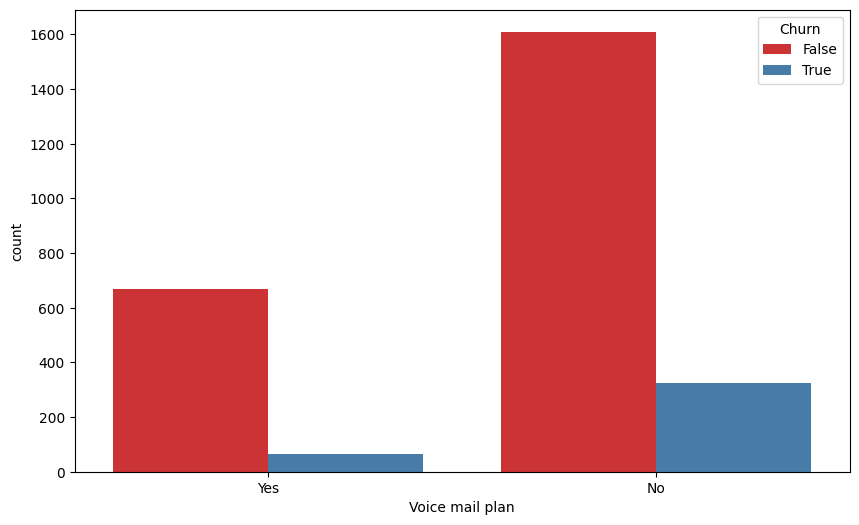

In [17]:
 # Previeving the categorical features and how it relates with the target variable
features = ['Area code','International plan',  'Voice mail plan']

for f in features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=f, hue='Churn', palette = 'Set1')

In [18]:
# Investigating the distribution of all Numerical values

# identifying all numeric columns
numericals = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_variables = df.select_dtypes(include=numericals).columns
num_variables

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

The meadian is:  100.0


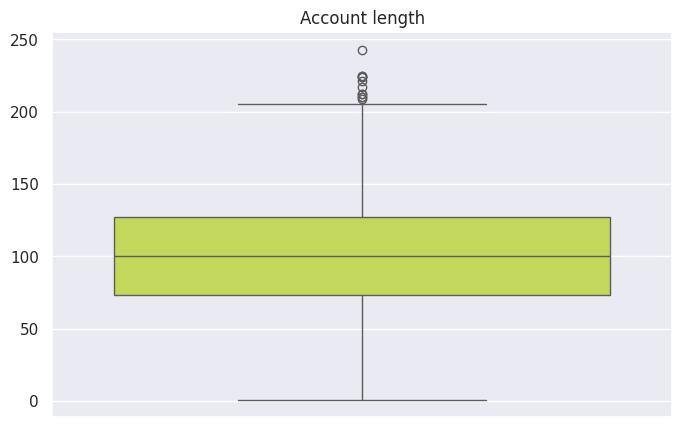

The meadian is:  415.0


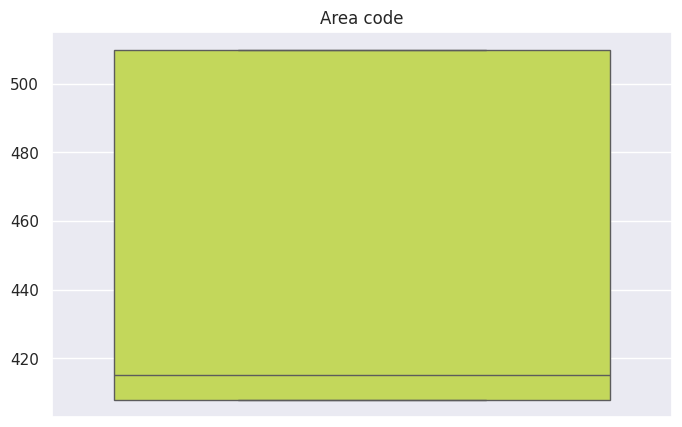

The meadian is:  0.0


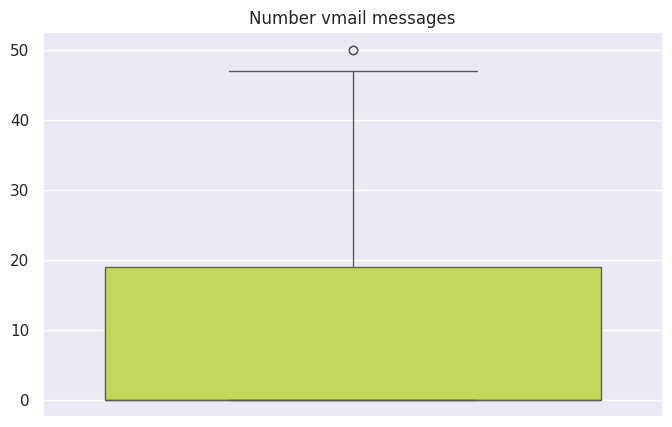

The meadian is:  179.95


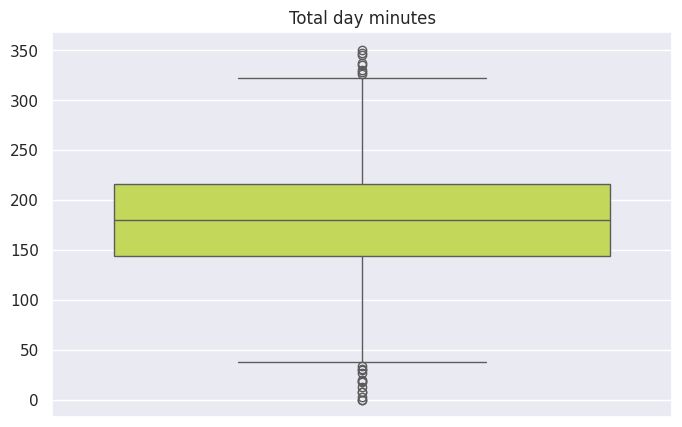

The meadian is:  101.0


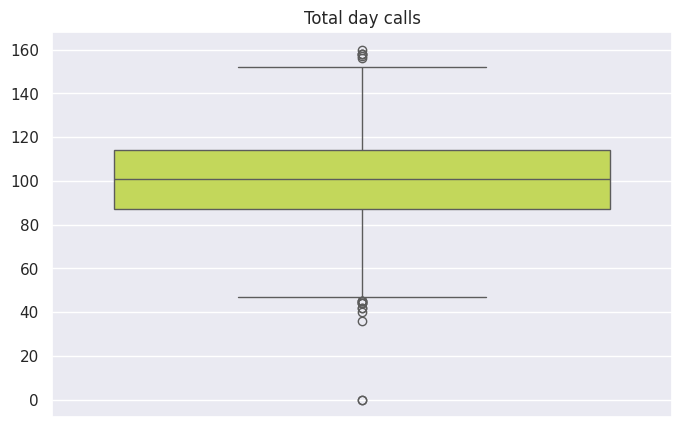

The meadian is:  30.59


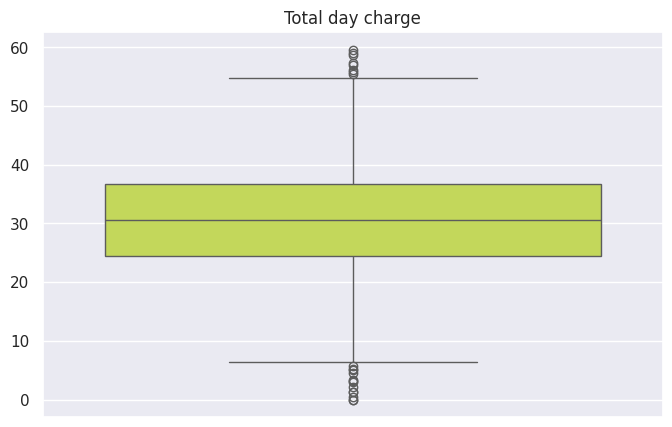

The meadian is:  200.9


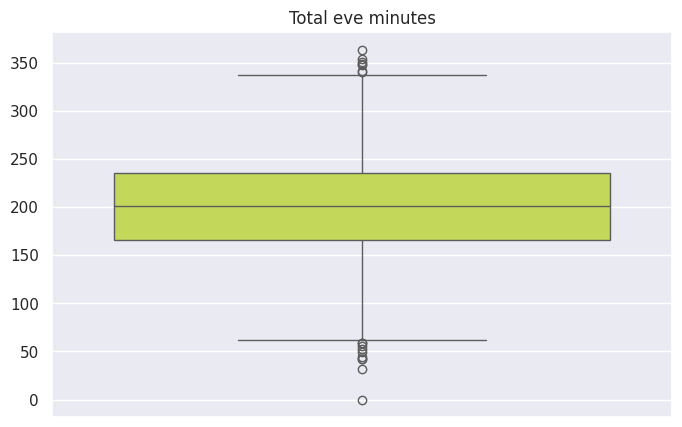

The meadian is:  100.0


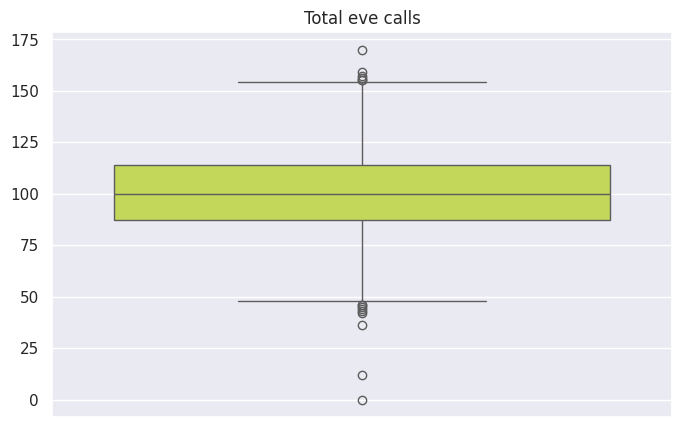

The meadian is:  17.08


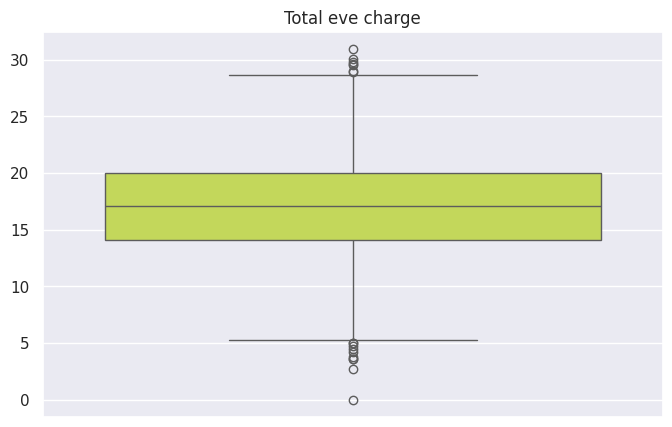

The meadian is:  201.14999999999998


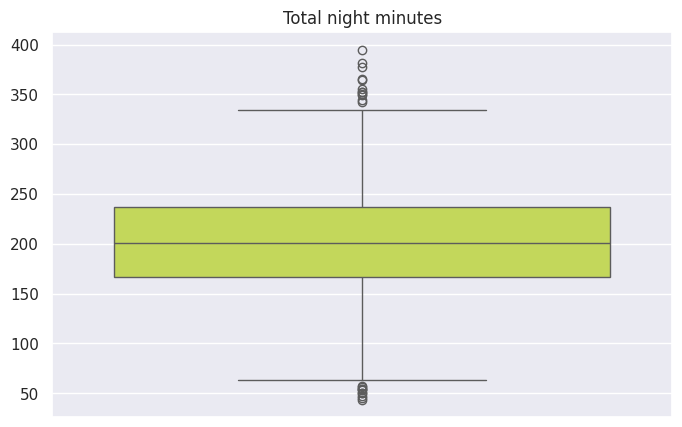

The meadian is:  100.0


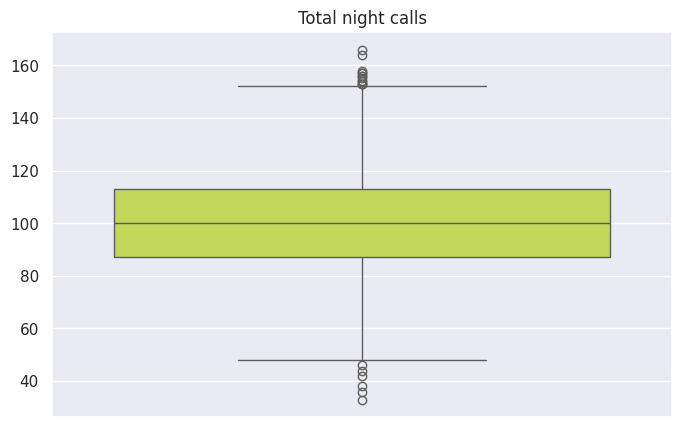

The meadian is:  9.05


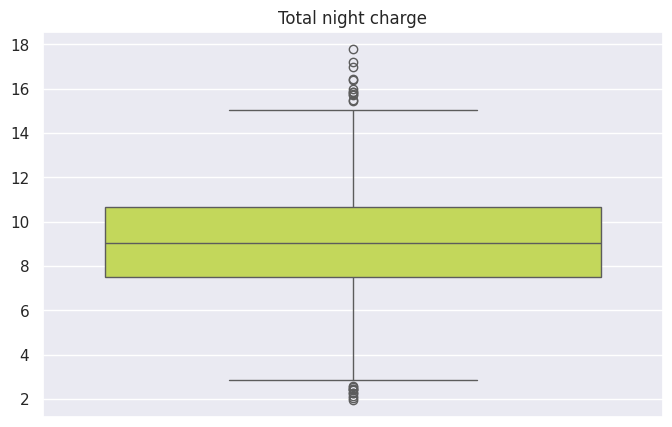

The meadian is:  10.2


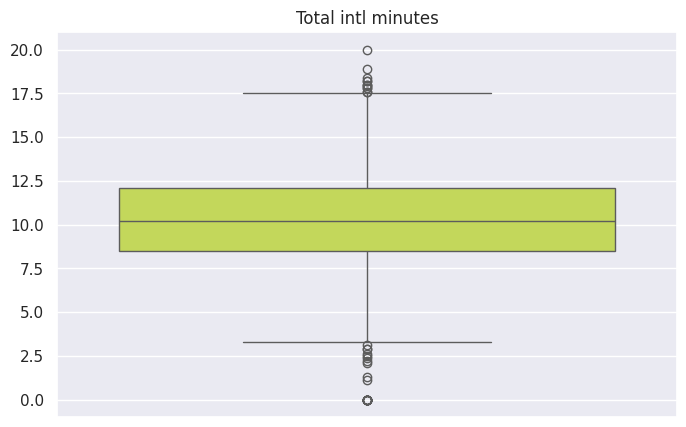

The meadian is:  4.0


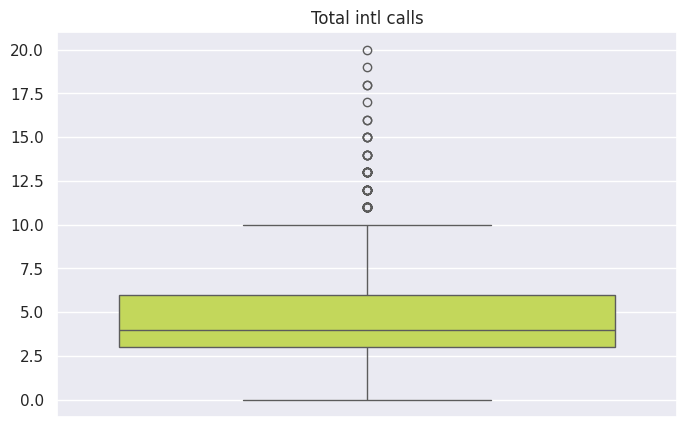

The meadian is:  2.75


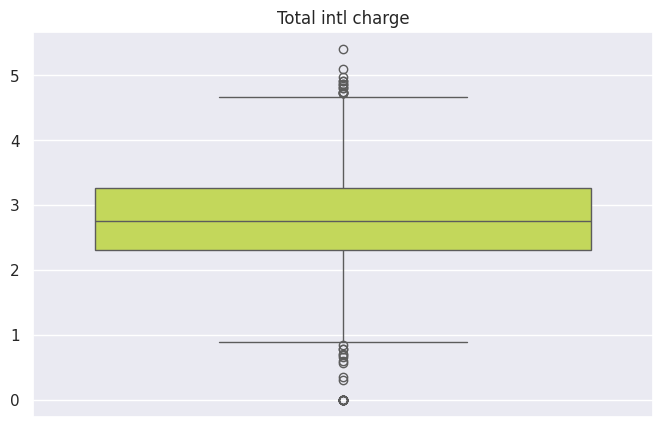

The meadian is:  1.0


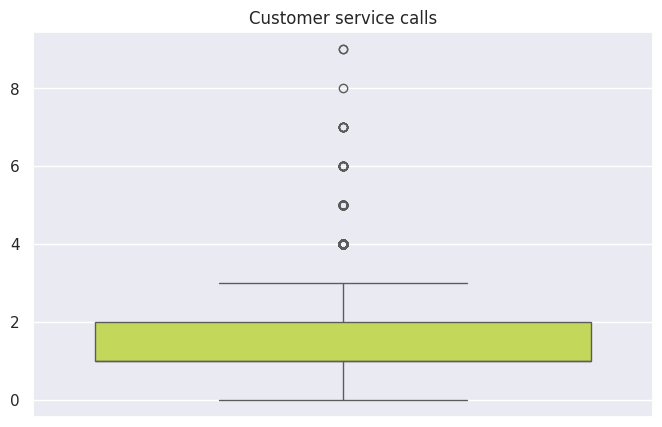

In [19]:
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in num_variables:
    x = df[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', df[c].median())
    plt.title(c)
    plt.show()

# Data Encoding and Scaling

Seperating from the Target Variable for Vectorization

In [20]:
# Preparing the datset to be fed into the model
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Scaling the columns
scaler_features = ['Account length', 'Area code', 'Total day minutes', 'Total day calls', 'Total day charge',
                   'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls',
                   'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
scaler = StandardScaler()
df[scaler_features] = scaler.fit_transform(df[scaler_features])
df

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_Yes,Voice mail plan_Yes
0,0.692163,-0.527811,25,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,-0.469031,0.856707,-0.085020,-0.597527,-0.085681,-0.429172,False,False,True
1,0.161278,-0.527811,26,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,0.149054,1.049293,1.242179,-0.597527,1.242921,-0.429172,False,False,True
2,0.919686,-0.527811,0,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,0.200561,-0.758391,0.704125,0.216894,0.698194,-1.191955,False,False,False
3,-0.420168,-0.692467,0,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,-0.572045,-0.084339,-1.304609,1.031314,-1.307995,0.333610,False,True,False
4,-0.647691,-0.527811,0,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,1.076181,-0.281303,-0.049150,-0.597527,-0.045823,1.096392,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,-0.546569,-0.527811,0,-0.826226,-0.115600,-0.826178,-0.209771,-1.588658,-0.210869,0.398478,1.436730,0.397126,0.560644,0.216894,0.565334,0.333610,False,False,False
2662,2.310100,-0.527811,36,-0.429549,-1.166419,-0.430042,0.296687,1.288660,0.297208,1.534958,-0.881087,1.535136,-0.120891,0.624104,-0.125539,0.333610,False,False,True
2663,-0.824652,-0.527811,0,0.952365,-2.167199,0.952636,-0.922347,-2.233574,-0.922176,-0.194382,1.179195,-0.193763,-0.228501,-0.190317,-0.231828,1.096392,False,False,False
2664,-1.835863,1.706797,0,0.024324,0.434829,0.024701,1.735580,-2.084747,1.735990,-0.182564,-0.469031,-0.180632,1.385660,0.624104,1.389067,0.333610,False,False,False


In [21]:
X = df.drop(columns=['Churn'], axis = 1)

X

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan_Yes,Voice mail plan_Yes
0,0.692163,-0.527811,25,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,-0.469031,0.856707,-0.085020,-0.597527,-0.085681,-0.429172,False,True
1,0.161278,-0.527811,26,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,0.149054,1.049293,1.242179,-0.597527,1.242921,-0.429172,False,True
2,0.919686,-0.527811,0,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,0.200561,-0.758391,0.704125,0.216894,0.698194,-1.191955,False,False
3,-0.420168,-0.692467,0,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,-0.572045,-0.084339,-1.304609,1.031314,-1.307995,0.333610,True,False
4,-0.647691,-0.527811,0,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,1.076181,-0.281303,-0.049150,-0.597527,-0.045823,1.096392,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,-0.546569,-0.527811,0,-0.826226,-0.115600,-0.826178,-0.209771,-1.588658,-0.210869,0.398478,1.436730,0.397126,0.560644,0.216894,0.565334,0.333610,False,False
2662,2.310100,-0.527811,36,-0.429549,-1.166419,-0.430042,0.296687,1.288660,0.297208,1.534958,-0.881087,1.535136,-0.120891,0.624104,-0.125539,0.333610,False,True
2663,-0.824652,-0.527811,0,0.952365,-2.167199,0.952636,-0.922347,-2.233574,-0.922176,-0.194382,1.179195,-0.193763,-0.228501,-0.190317,-0.231828,1.096392,False,False
2664,-1.835863,1.706797,0,0.024324,0.434829,0.024701,1.735580,-2.084747,1.735990,-0.182564,-0.469031,-0.180632,1.385660,0.624104,1.389067,0.333610,False,False


In [22]:
y = df["Churn"]
y= y.astype(int)
y

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
2661,0
2662,0
2663,0
2664,0


In [23]:
print(X.shape)
print(y.shape)

(2666, 18)
(2666,)


Split into 3 parts, the 3rd pard will be used to validate the best emerging, that is the model that will be tested with the Dummy Classifier

In [24]:
# First Set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,  random_state=12)


# Second Set
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9, test_size=0.1,  random_state=12)

print(X_train.shape)
print(X_test.shape)
#print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
#print(y_valid.shape)

(2132, 18)
(534, 18)
(2132,)
(534,)


# Making Prediction with base model

In [25]:
# Initialize the Logistic Regression Model
model = LogisticRegression(random_state=12, max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training and Testing Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
auc = roc_auc_score(y_test, y_test_pred)
print(f"AUC: {auc:.2f}")
f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score: {f1:.2f}")
lwd = log_loss(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
lwd = log_loss(y_test, y_test_pred)
print(f"Log Loss: {lwd:.2f}")


Training Accuracy: 0.86
Testing Accuracy: 0.86
AUC: 0.56
F1 Score: 0.23
Precision: 0.52
Recall: 0.14
F1 Score: 0.23
Log Loss: 5.06


In [26]:
# Generating the Confusion Matrix
def plot_confusion_matrix(cm,
                          classes=None,
                          title='Confusion matrix'):
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True,
             xticklabels=classes,
             yticklabels=classes,
             vmin=0, vmax=1,
             cmap="Blues",
             fmt='.2f')
  plt.title(title)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

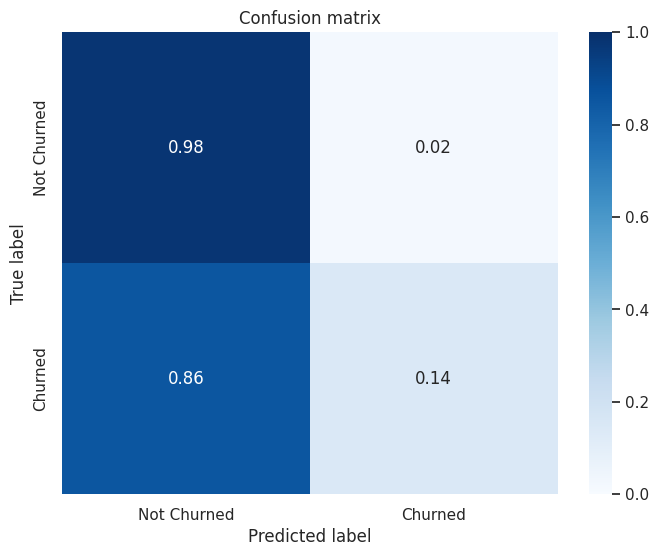

In [27]:
cm_display = confusion_matrix(y_test, y_test_pred, normalize='true')
plot_confusion_matrix(cm_display, classes=['Not Churned', 'Churned'])

# Using Random Forest for Feature Importance on base Model

In [28]:
# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=20)
rf.fit(X_train, y_train)


# Get feature importances from the model
importances = rf.feature_importances_

# Sort features by importance (most important first)
important_features = np.argsort(importances)[::-1]


print("Feature importances from Random Forest:", importances)


Feature importances from Random Forest: [0.03587206 0.00997251 0.0275276  0.14046888 0.0343673  0.12444898
 0.0658637  0.02623899 0.06892509 0.03763053 0.03104424 0.03629051
 0.04553406 0.05489202 0.04400048 0.10597882 0.09455882 0.01638541]


# Using RFE for feature selection

In [29]:
N = 10 # N is number of top features to select
model = LogisticRegression(max_iter=1000)

rfe = RFE(estimator=model, n_features_to_select=N)
rfe.fit(X_train.iloc[:, importances], y_train)

# Get the selected feature indices
selected_features = important_features[rfe.support_]
print(f"Selected feature indices using RFE: {selected_features}")



Selected feature indices using RFE: [ 6 13 12 14  9 11  0  4 10  7]


# Using Random Forest Feature Selection and Logistic Regression

In [30]:
# Retrain Logistic Regression with Selected Features
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

model_selected = LogisticRegression()
model_selected.fit(X_train_selected, y_train)

# Evaluate Performance
y_pred_selected = model_selected.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred_selected)

print(f"Logistic Regression Accuracy after feature selection: {accuracy:.4f}")
print(f"AUC: {auc:.2f}")
f1 = f1_score(y_test, y_pred_selected)
print(f"F1 Score: {f1:.2f}")
lwd = log_loss(y_test, y_pred_selected)
precision = precision_score(y_test, y_pred_selected)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred_selected)
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
lwd = log_loss(y_test, y_pred_selected)
print(f"Log Loss: {lwd:.2f}")



Logistic Regression Accuracy after feature selection: 0.8577
AUC: 0.56
F1 Score: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Log Loss: 5.13


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Visualising the FEature Importances

Feature Importance from Random Forest:
                   Feature  Importance
3        Total day minutes    0.140469
5         Total day charge    0.124449
15  Customer service calls    0.105979
16  International plan_Yes    0.094559
8         Total eve charge    0.068925
6        Total eve minutes    0.065864
13        Total intl calls    0.054892
12      Total intl minutes    0.045534
14       Total intl charge    0.044000
9      Total night minutes    0.037631
11      Total night charge    0.036291
0           Account length    0.035872
4          Total day calls    0.034367
10       Total night calls    0.031044
2    Number vmail messages    0.027528
7          Total eve calls    0.026239
17     Voice mail plan_Yes    0.016385
1                Area code    0.009973


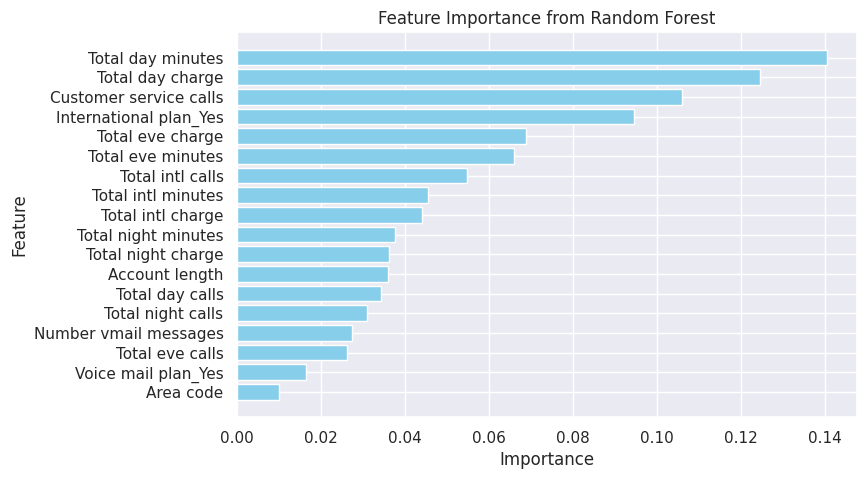

In [31]:
feature_importance_df = pd.DataFrame({
      'Feature': df.drop('Churn', axis=1).columns,
      'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print("Feature Importance from Random Forest:")
print(feature_importance_df)

# Visualize feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show most important feature at the top
plt.show()

Feature importance did not return any zero values, mening that all of the features are important

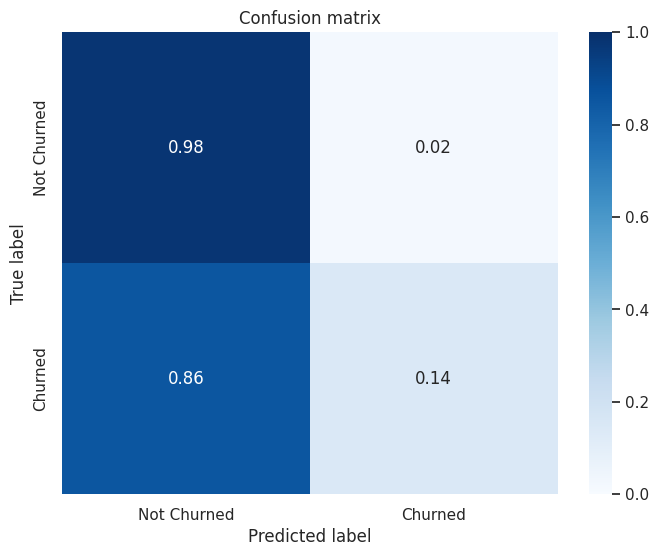

In [32]:
cm_display = confusion_matrix(y_test, y_test_pred, normalize='true')
plot_confusion_matrix(cm_display, classes=['Not Churned', 'Churned'])

# Previewing the Feature Importance

In [33]:
df_fi = feature_importance_df.reset_index()

df_fi

,index,Feature,Importance
0,3,Total day minutes,0.140469
1,5,Total day charge,0.124449
2,15,Customer service calls,0.105979
3,16,International plan_Yes,0.094559
4,8,Total eve charge,0.068925
5,6,Total eve minutes,0.065864
6,13,Total intl calls,0.054892
7,12,Total intl minutes,0.045534
8,14,Total intl charge,0.044000
9,9,Total night minutes,0.037631


# Applying SMOTE on the base model

In [34]:
# SMOTE is used to upscale the minority class and balance up the majority
smoted = SMOTE(random_state=12)
X_train_smote, y_train_smote = smoted.fit_resample(X_train, y_train)


# Initialize the Logistic Regression Model
model = LogisticRegression(random_state=12, max_iter=1000)
model.fit(X_train_smote, y_train_smote)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training and Testing Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
auc = roc_auc_score(y_test, y_test_pred)
print(f"AUC: {auc:.2f}")
f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score: {f1:.2f}")
lwd = log_loss(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
lwd = log_loss(y_test, y_test_pred)
print(f"Log Loss: {lwd:.2f}")


Training Accuracy: 0.79
Testing Accuracy: 0.78
AUC: 0.75
F1 Score: 0.48
Precision: 0.36
Recall: 0.70
F1 Score: 0.48
Log Loss: 7.83


# Investigating the Distribution after SMOTE

<ipython-input-36-721c45f73903>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = y_train_smote, palette = 'Set1')


Text(0.5, 1.0, 'Training Target Distribution After SMOTE')

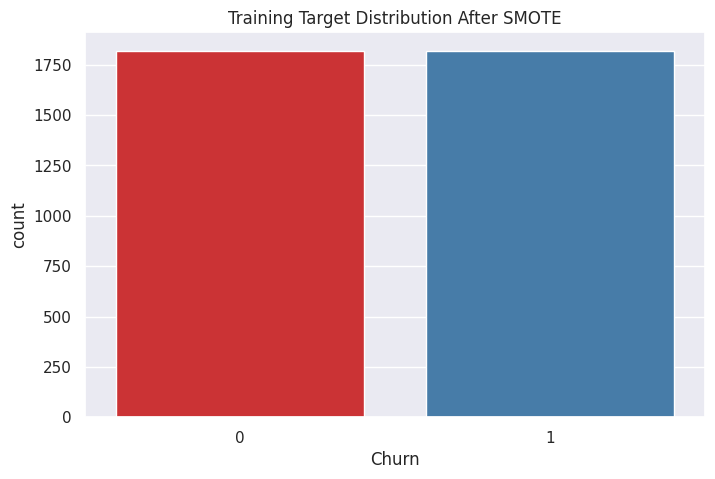

In [36]:
# Visualize the target distribution after SMOTE

ax = sns.countplot(x = y_train_smote, palette = 'Set1')
plt.title("Training Target Distribution After SMOTE")

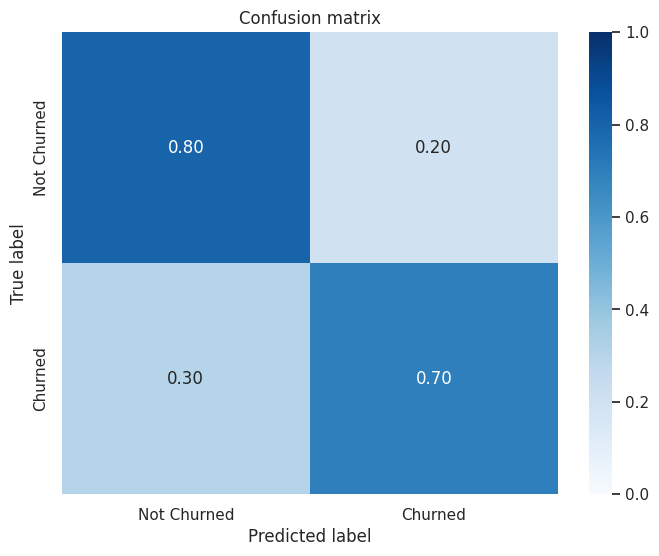

In [37]:
cm_display = confusion_matrix(y_test, y_test_pred, normalize='true')
plot_confusion_matrix(cm_display, classes=['Not Churned', 'Churned'])

Applying SMOTE with the RFE

In [39]:
N = 10 # N is number of top features to select
model = LogisticRegression(max_iter=1000)

# SMOTE is used to upscale the minority class and balance up the majority
smoted = SMOTE(random_state=12)
X_train_smote, y_train_smote = smoted.fit_resample(X_train, y_train)

rfe = RFE(estimator=model, n_features_to_select=N)
rfe.fit(X_train_smote.iloc[:, importances], y_train_smote)

# Get the selected feature indices
selected_features = important_features[rfe.support_]
print(f"Selected feature indices using RFE: {selected_features}")

# Retrain Logistic Regression with Selected Features
X_train_selected = X_train_smote.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

model_selected = LogisticRegression()
model_selected.fit(X_train_selected, y_train_smote)

# Evaluate Performance
y_pred_selected = model_selected.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred_selected)

print(f"Logistic Regression Accuracy after feature selection with SMOTE: {accuracy:.4f}")
print(f"AUC: {auc:.2f}")
f1 = f1_score(y_test, y_pred_selected)
print(f"F1 Score: {f1:.2f}")
lwd = log_loss(y_test, y_pred_selected)
precision = precision_score(y_test, y_pred_selected)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred_selected)
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
lwd = log_loss(y_test, y_pred_selected)
print(f"Log Loss: {lwd:.2f}")


Selected feature indices using RFE: [ 6 13 12 14  9 11  0  4 10  7]
Logistic Regression Accuracy after feature selection with SMOTE: 0.5787
AUC: 0.75
F1 Score: 0.31
Precision: 0.20
Recall: 0.66
F1 Score: 0.31
Log Loss: 15.19


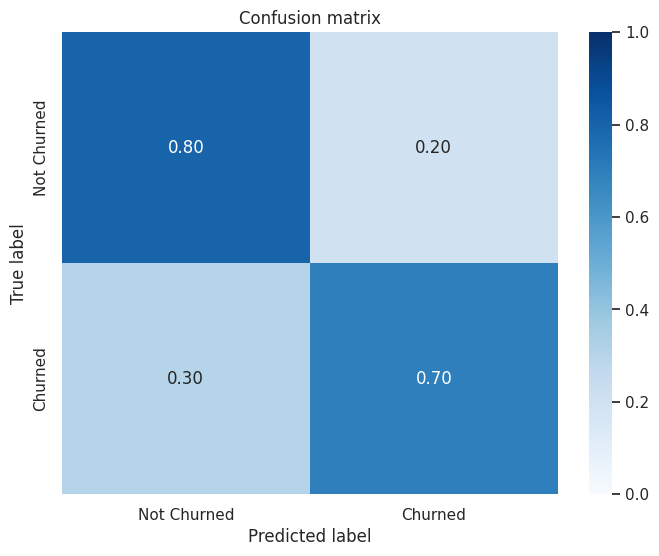

In [40]:
cm_display = confusion_matrix(y_test, y_test_pred, normalize='true')
plot_confusion_matrix(cm_display, classes=['Not Churned', 'Churned'])

# Experimenting with the Random Under Sampler

In [41]:
# Initialize the undersampler
undersampler = RandomUnderSampler(random_state=12)

# Apply undersampling to balance the dataset
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)


# Initialize the Logistic Regression Model
model = LogisticRegression(random_state=12, max_iter=1000)
model.fit(X_train_under, y_train_under)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training and Testing Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
auc = roc_auc_score(y_test, y_test_pred)
print(f"AUC: {auc:.2f}")
f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score: {f1:.2f}")
lwd = log_loss(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
lwd = log_loss(y_test, y_test_pred)
print(f"Log Loss: {lwd:.2f}")


Training Accuracy: 0.77
Testing Accuracy: 0.75
AUC: 0.74
F1 Score: 0.45
Precision: 0.33
Recall: 0.71
F1 Score: 0.45
Log Loss: 8.84


<ipython-input-42-5cd8a980fde3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = y_train_under, palette = 'Set1')


Text(0.5, 1.0, 'Experimenting with Random UnderSampler')

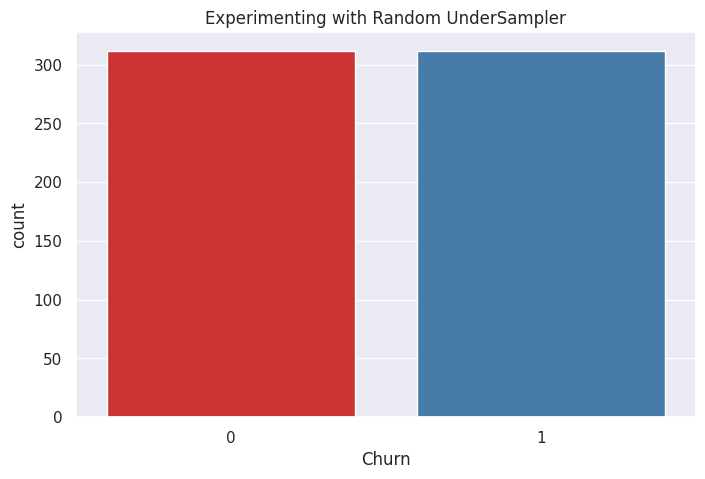

In [42]:
# Investigating the Distribution
# Visualize the target distribution after SMOTE

ax = sns.countplot(x = y_train_under, palette = 'Set1')
plt.title("Experimenting with Random UnderSampler")

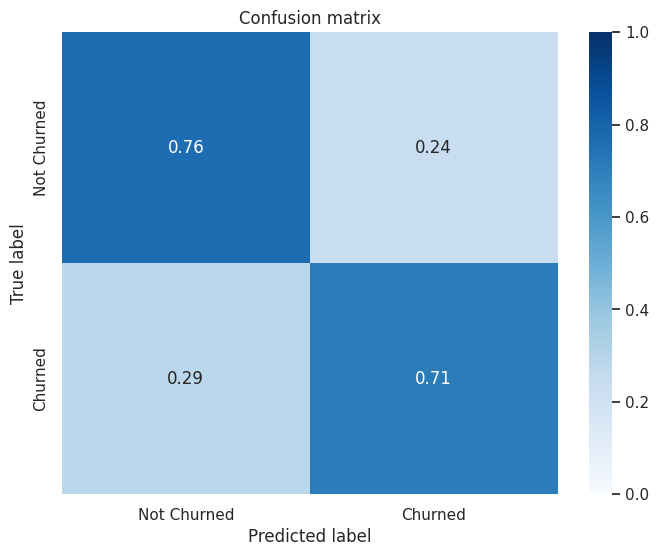

In [43]:
cm_display = confusion_matrix(y_test, y_test_pred, normalize='true')
plot_confusion_matrix(cm_display, classes=['Not Churned', 'Churned'])

Run Decision Tree Classifier to Visualize our perdiction probabilities

Training Accuracy: 0.86
Testing Accuracy: 0.85
AUC: 0.81
F1 Score: 0.59
Precision: 0.48
Recall: 0.75
F1 Score: 0.59
Log Loss: 5.40


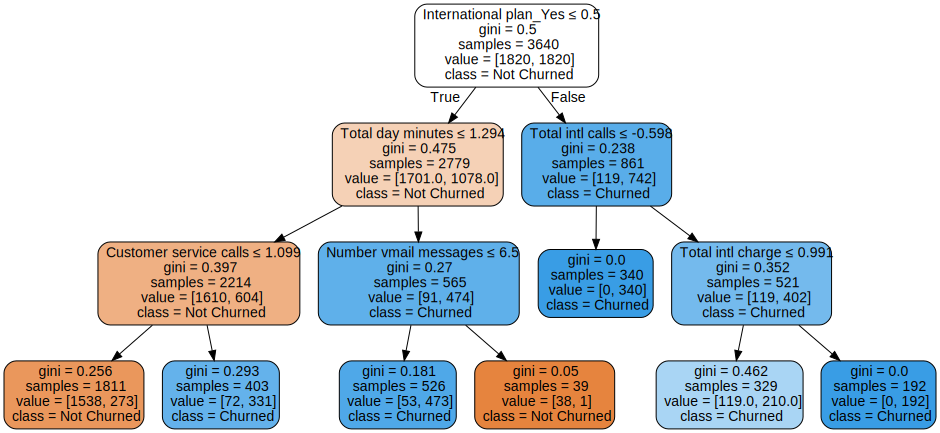

In [44]:
# Running Decision Tree Classifier with SMOTE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Train  Decision TReee Classifier
dt_classifier = DecisionTreeClassifier(random_state=12, max_depth=3)
dt_classifier.fit(X_train_smote, y_train_smote)


# Assuming df_new is your original DataFrame before converting to NumPy array
feature_names = df.drop('Churn', axis=1).columns  # Get feature names from DataFrame


# Predictions and Evaluation
y_train_pred = dt_classifier.predict(X_train_smote)
y_test_pred = dt_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train_smote, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
auc = roc_auc_score(y_test, y_test_pred)
print(f"AUC: {auc:.2f}")
f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score: {f1:.2f}")
lwd = log_loss(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
lwd = log_loss(y_test, y_test_pred)
print(f"Log Loss: {lwd:.2f}")


# Export the decision tree to DOT format
dt_data = export_graphviz(dt_classifier,
                          out_file=None,
                          feature_names=feature_names,
                          class_names=['Not Churned', 'Churned'],
                          filled=True,
                          rounded=True,
                          special_characters=True)

# Visualuze the tree using Graphviz
graph = graphviz.Source(dt_data)
graph

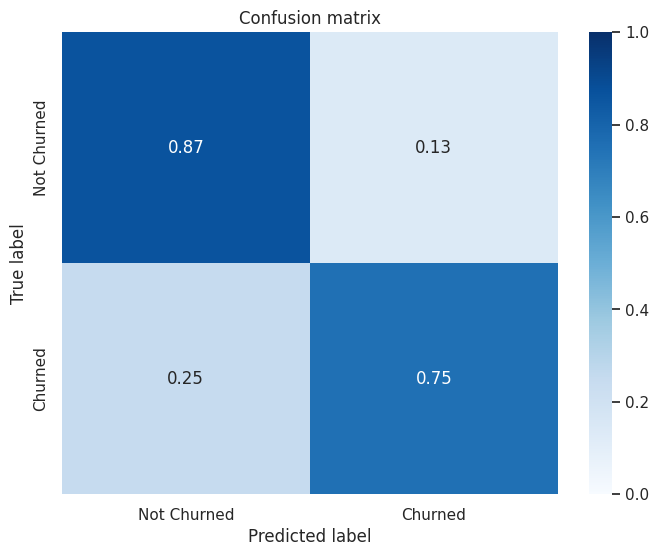

In [45]:
cm_display = confusion_matrix(y_test, y_test_pred, normalize='true')
plot_confusion_matrix(cm_display, classes=['Not Churned', 'Churned'])

# Running a Pipeline on base model (Logistic Regression)

In [46]:

# Create an imblearn pipeline that includes SMOTE, scaling, and Logistic Regression
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=12)),  # Apply SMOTE to the training data
    ('scaler', StandardScaler()),       # Scale features
    ('logistic', LogisticRegression(random_state=12, max_iter=1000))
])


# Train the model using the pipeline
pipeline.fit(X_train, y_train)


# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_test_pred)
print(f"AUC: {auc:.2f}")
f1 = f1_score(y_test, y_test_pred)
lwd = log_loss(y_test, y_test_pred)
print(f"Log Loss: {lwd:.2f}")




Test Accuracy: 0.7808988764044944

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86       458
           1       0.36      0.70      0.48        76

    accuracy                           0.78       534
   macro avg       0.65      0.75      0.67       534
weighted avg       0.86      0.78      0.81       534

AUC: 0.81
Log Loss: 5.40


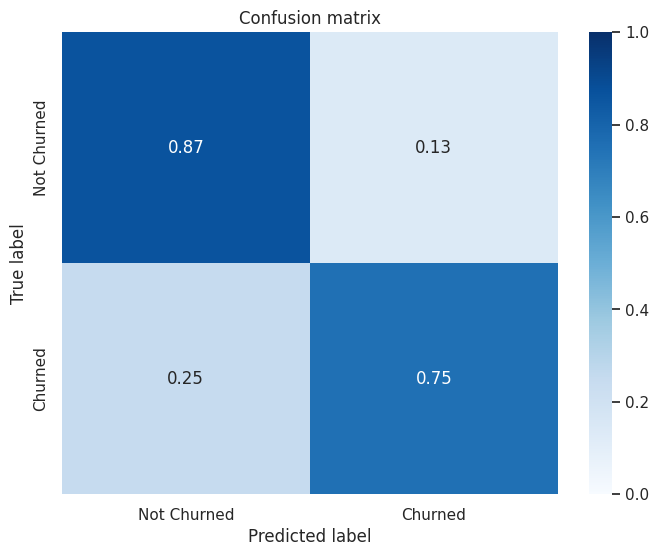

In [47]:
cm_display = confusion_matrix(y_test, y_test_pred, normalize='true')
plot_confusion_matrix(cm_display, classes=['Not Churned', 'Churned'])

# Running Pipeline with SMOTE and Hyperparameter Tuning

In [48]:
# Create an imblearn pipeline that includes SMOTE, scaling, and Logistic Regression
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=12)),  # Apply SMOTE to the training data
    ('scaler', StandardScaler()),       # Scale features
    ('logistic', LogisticRegression(random_state=12, max_iter=1000))
])

# Define hyperparameters to tune
param_grid = {
    'smote__sampling_strategy': [0.1, 1.0, 1.25, 1.75],  # Ratio for SMOTE
    'logistic__C': [0.1, 1, 10],
    'logistic__solver': ['liblinear', 'lbfgs', 'saga']
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score:", test_score)

Test Accuracy: 0.7808988764044944

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86       458
           1       0.36      0.70      0.48        76

    accuracy                           0.78       534
   macro avg       0.65      0.75      0.67       534
weighted avg       0.86      0.78      0.81       534

Best parameters: {'logistic__C': 10, 'logistic__solver': 'liblinear', 'smote__sampling_strategy': 1.0}
Best cross-validation score: 0.7856348593200083
Test set score: 0.7808988764044944


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
81 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_par

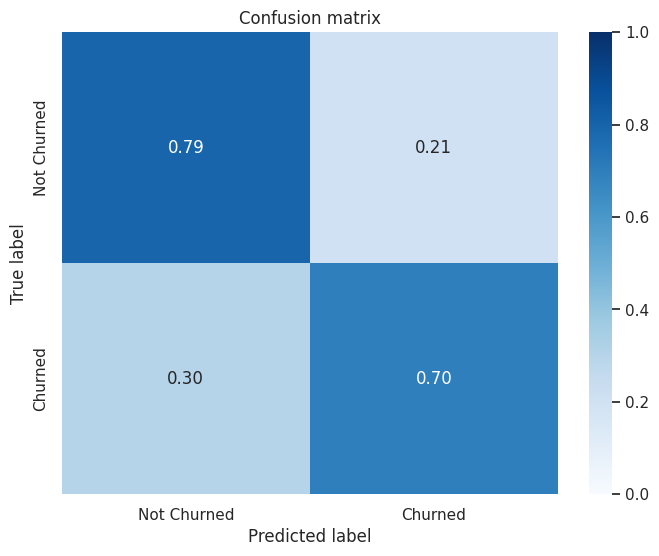

In [49]:
cm_display = confusion_matrix(y_test, y_pred, normalize='true')
plot_confusion_matrix(cm_display, classes=['Not Churned', 'Churned'])

# Runnung multiple Models for comparision
Save the output in Results

In [50]:
# Models and hyperparameters
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {'model__C': [0.01, 0.1, 1, 10, 100],
                   'model__solver': ['liblinear', 'lbfgs', 'saga'],
                   'model__max_iter': [1000]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {'model__n_estimators': [50, 100, 200, 300],
                   'model__max_depth': [10, 20, None],
                   'model__min_samples_split': [2, 5, 10],
                   'model__min_samples_leaf': [1, 2, 4]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {'model__C': [0.1, 1, 10, 100],
                   'model__kernel': ['linear', 'rbf'],  # 'coef_' is not a valid kernel
                   'model__gamma': ['scale', 'auto', 0.1, 1],
                   'model__class_weight': [None, 'balanced']}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'model__n_neighbors': [3, 5, 7, 10],
                   'model__weights': ['uniform', 'distance'],
                   'model__p': [1, 2],
                   'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {}  # No hyperparameters to tune
    },
    'XGBoost': {
        'model': XGBClassifier(eval_metric='logloss', use_label_encoder=False),
        'params': {'model__n_estimators': [100, 200, 300],
                   'model__max_depth': [3, 5, 7],
                   'model__learning_rate': [0.01, 0.1, 0.2],
                   'model__subsample': [0.8, 0.9, 1.0],
                   'model__colsample_bytree': [0.8, 0.9, 1.0]}
    }
}

# Store results
results = {}

# Training the Models and adding Optimizing Features


Training Logistic Regression...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Params: {'model__C': 100, 'model__max_iter': 1000, 'model__solver': 'lbfgs'}
AUC Score: 0.8151, Accuracy: 0.8652, F1 Score: 0.2800, Precision: 0.5833, Recall: 0.1842

Training Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Params: {'model__max_depth': 20, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
AUC Score: 0.8953, Accuracy: 0.9419, F1 Score: 0.7832, Precision: 0.8358, Recall: 0.7368

Training SVM...
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Skipping RFE for SVM as it lacks 'coef_' or 'feature_importances_'.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Params: {'model__C': 1, 'model__class_weight': None, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
AUC Score: 0.8638, Accuracy: 0.8577, F1 Score: 0.0000, Precision: 0.0000, Recall: 0.0000

Training KNN...
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Skipping RFE for KNN as it lacks 'coef_' or 'feature_importances_'.
Best Params: {'model__algorithm': 'auto', 'model__n_neighbors': 10, 'model__p': 2, 'model__weights': 'distance'}
AUC Score: 0.7661, Accuracy: 0.8745, F1 Score: 0.2299, Precision: 0.9091, Recall: 0.1316

Training GaussianNB...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Skipping RFE for GaussianNB as it lacks 'coef_' or 'feature_importances_'.
Best Params: {}
AUC Score: 0.8122, Accuracy: 0.8539, F1 Score: 0.4800, Precision: 0.4865, Recall: 0.4737

Training XGBoost...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:53:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:53:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:53:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:53:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:53:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best Params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 0.9}
AUC Score: 0.9169, Accuracy: 0.9569, F1 Score: 0.8392, Precision: 0.8955, Recall: 0.7895


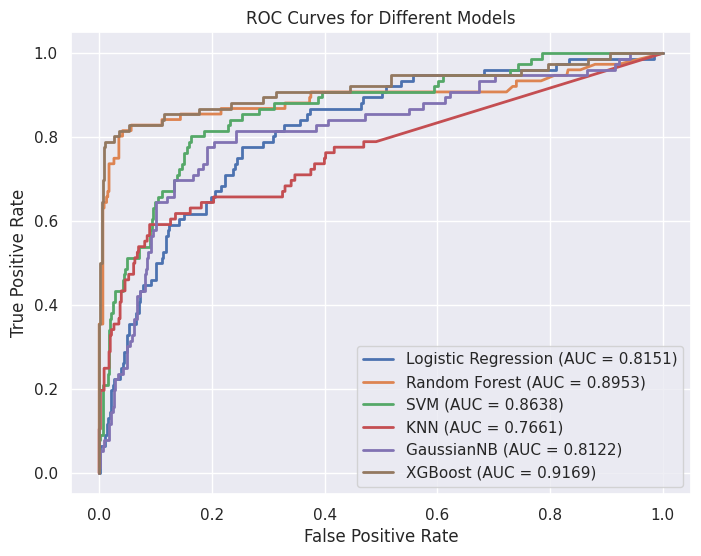


Final Model Performance:

Logistic Regression:
  best_params: {'model__C': 100, 'model__max_iter': 1000, 'model__solver': 'lbfgs'}
  AUC: 0.8151
  Accuracy: 0.8652
  F1 Score: 0.2800
  Precision: 0.5833
  Recall: 0.1842

Random Forest:
  best_params: {'model__max_depth': 20, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
  AUC: 0.8953
  Accuracy: 0.9419
  F1 Score: 0.7832
  Precision: 0.8358
  Recall: 0.7368

SVM:
  best_params: {'model__C': 1, 'model__class_weight': None, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
  AUC: 0.8638
  Accuracy: 0.8577
  F1 Score: 0.0000
  Precision: 0.0000
  Recall: 0.0000

KNN:
  best_params: {'model__algorithm': 'auto', 'model__n_neighbors': 10, 'model__p': 2, 'model__weights': 'distance'}
  AUC: 0.7661
  Accuracy: 0.8745
  F1 Score: 0.2299
  Precision: 0.9091
  Recall: 0.1316

GaussianNB:
  best_params: {}
  AUC: 0.8122
  Accuracy: 0.8539
  F1 Score: 0.4800
  Precision: 0.4865
  Recall: 0.4737

XGBoost:
 

In [51]:
# Initialize ROC plot
plt.figure(figsize=(8, 6))

# Loop through models
for name, config in models.items():
    print(f"\nTraining {name}...")

    # Define the pipeline
    pipeline = ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', config['model'])
    ])

    # GridSearchCV with proper scoring
    grid = GridSearchCV(
        pipeline,
        param_grid=config['params'],
        cv=5,
        scoring=['roc_auc', 'accuracy', 'f1', 'precision', 'recall'],
        refit='roc_auc',
        n_jobs=-1,
        verbose=3,
        return_train_score=True,
        error_score='raise'
    )

    # Fit model
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    # Feature Selection (Only if applicable)
    model_step = best_model.steps[-1][1]  # Extract model from pipeline
    if hasattr(model_step, 'coef_') or hasattr(model_step, 'feature_importances_'):
        rfe = RFE(estimator=model_step, n_features_to_select=10)
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_test_rfe = rfe.transform(X_test)
        model_step.fit(X_train_rfe, y_train)  # Retrain model with RFE-selected features
    else:
        print(f"Skipping RFE for {name} as it lacks 'coef_' or 'feature_importances_'.")
        X_train_rfe, X_test_rfe = X_train, X_test
        model_step.fit(X_train_rfe, y_train)

    # Predictions
    y_pred = model_step.predict(X_test_rfe)
    y_proba = model_step.predict_proba(X_test_rfe)[:, 1]  # Get probability for ROC-AUC

    # Compute Metrics
    auc_score = roc_auc_score(y_test, y_proba)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results[name] = {
        'best_params': grid.best_params_,
        'AUC': auc_score,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    }

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    print(f"Best Params: {grid.best_params_}")
    print(f"AUC Score: {auc_score:.4f}, Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

    # Plot ROC Curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc_score:.4f})')

# Display ROC Curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()

# Print final results
print("\nFinal Model Performance:")
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}" if isinstance(value, float) else f"  {metric}: {value}")

# Comparing Multiple Results


Model Performance Summary:
                                                            best_params  \
XGBoost              {'model__colsample_bytree': 0.8, 'model__learn...   
Random Forest        {'model__max_depth': 20, 'model__min_samples_l...   
SVM                  {'model__C': 1, 'model__class_weight': None, '...   
Logistic Regression  {'model__C': 100, 'model__max_iter': 1000, 'mo...   
GaussianNB                                                          {}   
KNN                  {'model__algorithm': 'auto', 'model__n_neighbo...   

                          AUC  Accuracy  F1 Score Precision    Recall  
XGBoost              0.916887  0.956929  0.839161  0.895522  0.789474  
Random Forest        0.895268  0.941948  0.783217  0.835821  0.736842  
SVM                  0.863824  0.857678       0.0       0.0       0.0  
Logistic Regression  0.815071  0.865169      0.28  0.583333  0.184211  
GaussianNB           0.812198  0.853933      0.48  0.486486  0.473684  
KNN                 

<ipython-input-52-f14fce0d9c50>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['AUC'], palette='Set2')


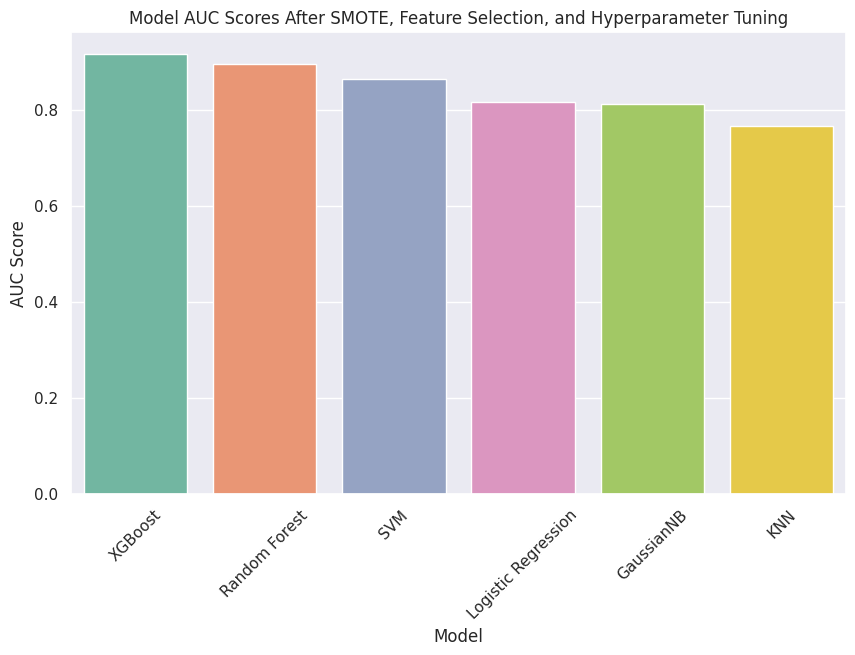

In [52]:
# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results).T.sort_values(by='AUC', ascending=False)
print("\nModel Performance Summary:\n", results_df)

# Plot Model AUC Scores
plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index, y=results_df['AUC'], palette='Set2')
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.xticks(rotation=45)
plt.title('Model AUC Scores After SMOTE, Feature Selection, and Hyperparameter Tuning')
plt.ylabel('AUC Score')
plt.show()

Plotting ROC of all Models

## Build an Ensemble of the Two most successfull models

In [55]:
# Define base models (level 1)
base_models = [
    ('xgb', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Define meta-model (level 2)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Create stacking ensemble
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred_stack = stacking_clf.predict(X_test)

# Evaluate accuracy
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f"Stacking Ensemble Accuracy: {accuracy_stack:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:03:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:03:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:03:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:03:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:03:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Stacking Ensemble Accuracy: 0.9588


# Comparing the best model with a Dummy Classifier

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:03:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Final Comparison:
Best Model (XGBoost) AUC after Feature Selection: 0.9144
Dummy Classifier AUC: 0.5000


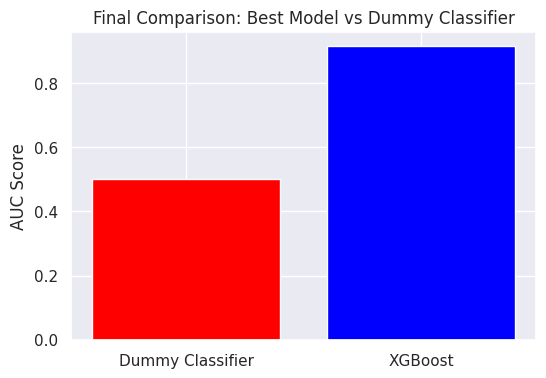

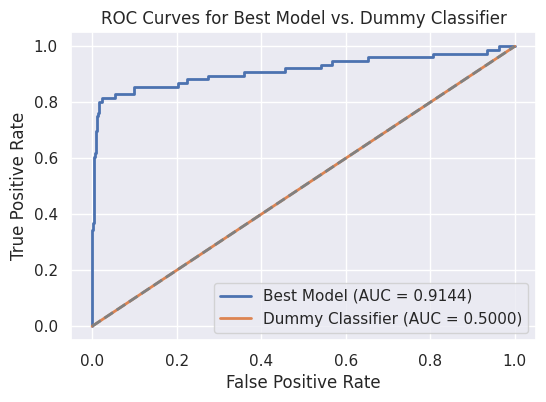

In [56]:
# Compare the best model with a Dummy Classifier
best_model_name = results_df.index[0]
best_model = models[best_model_name]['model']

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train_rfe, y_train)

y_proba_dummy = dummy.predict_proba(X_test_rfe)[:, 1]
y_proba_best = best_model.fit(X_train_rfe, y_train).predict_proba(X_test_rfe)[:, 1]

auc_dummy = roc_auc_score(y_test, y_proba_dummy)
auc_best = roc_auc_score(y_test, y_proba_best)

print(f"\nFinal Comparison:")
print(f"Best Model ({best_model_name}) AUC after Feature Selection: {auc_best:.4f}")
print(f"Dummy Classifier AUC: {auc_dummy:.4f}")

# Plot comparison
plt.figure(figsize=(6,4))
plt.bar(['Dummy Classifier', best_model_name], [auc_dummy, auc_best], color=['red', 'blue'])
plt.title('Final Comparison: Best Model vs Dummy Classifier')
plt.ylabel('AUC Score')
plt.show()


# --- Plot ROC Curves ---
plt.figure(figsize=(6, 4))

fpr_best, tpr_best, _ = roc_curve(y_test, y_proba_best)
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_proba_dummy)

plt.plot(fpr_best, tpr_best, lw=2, label=f'Best Model (AUC = {auc_best:.4f})')
plt.plot(fpr_dummy, tpr_dummy, lw=2, label=f'Dummy Classifier (AUC = {auc_dummy:.4f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Best Model vs. Dummy Classifier')
plt.legend(loc='lower right')
plt.show()